Importing the Libraries and Loading the CIFAR-10 Dataset



In [54]:
#using keras

# dependencies/ libraries
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# define num_class
num_classes = 10

# load dataset keras will download cifar-10 datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Visualizing the Original Dataset

Text(0.5, 1.0, 'Displaying a Random Image')

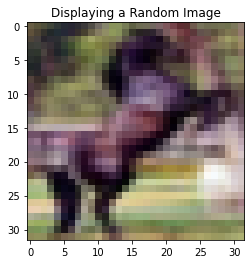

In [55]:
#visualizing a random image from the dataset
plt.figure()
plt.imshow(x_train[84])
plt.title('Displaying a Random Image')

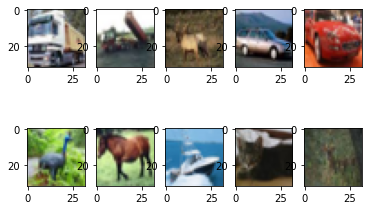

In [23]:
#visualizing multiple images from the dataset
for i in range(1,11):
  plt.subplot(2, 5, i)
  plt.imshow(x_train[i])

Preprocessing the Data

In [56]:
#Normalizing

#normalization refers to the rescaling of the data from its original range to 0-1 range scale. 
#It is important to normalize the dataset in order to reduce the pixel range of images from 0-255 to 0-1

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [25]:
#One-Hot Encoding

# Convert class vectors to binary class matrices
# In order to convert catagorical variables to numerical, we perform one hot encoding

# y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


Building CNN Model

In [76]:
# Creating the model

# We can use the Sequential API to generate a model layer by layer and then add it to the sequential class
model_cnn = tf.keras.models.Sequential()

# The first layer is convolution layer Conv2D
model_cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu", input_shape = [32,32,3]))

# The second Layer
model_cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))

# The pooling layer reduces the computation of the model
# MaxPooling is most commonly used pooling layer
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = "valid"))

# The third Layer
model_cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

# The fourth Layer
model_cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

# The pooling layer reduces the computation of the model
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

# Flattening is performed to convert 3D 
model_cnn.add(tf.keras.layers.Flatten())

# A dropout Layer is added in order to prevent overfitting
model_cnn.add(Dropout(0.2))

# Completely connected layer
model_cnn.add(tf.keras.layers.Dense(units = 128, activation = "relu"))

# Output Layer
model_cnn.add(tf.keras.layers.Dense(units = 10, activation = 'softmax')) #since we have 10 classes, we are assigning 10 units

In [77]:
#compiling the model
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [78]:
#training the model
history1 = model_cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 275s 176ms/step - loss: 1.3877 - sparse_categorical_accuracy: 0.4989
Epoch 2/10
1563/1563 [==============================] - 273s 175ms/step - loss: 0.9366 - sparse_categorical_accuracy: 0.6688
Epoch 3/10
1563/1563 [==============================] - 274s 175ms/step - loss: 0.7690 - sparse_categorical_accuracy: 0.7305
Epoch 4/10
1563/1563 [==============================] - 273s 175ms/step - loss: 0.6608 - sparse_categorical_accuracy: 0.7678
Epoch 5/10
1563/1563 [==============================] - 273s 175ms/step - loss: 0.5721 - sparse_categorical_accuracy: 0.7986
Epoch 6/10
1563/1563 [==============================] - 273s 175ms/step - loss: 0.5023 - sparse_categorical_accuracy: 0.8226
Epoch 7/10
1563/1563 [==============================] - 273s 175ms/step - loss: 0.4336 - sparse_categorical_accuracy: 0.8479
Epoch 8/10
1563/1563 [==============================] - 276s 176ms/step - loss: 0.3792 - sparse_categorical_accuracy: 0.8666


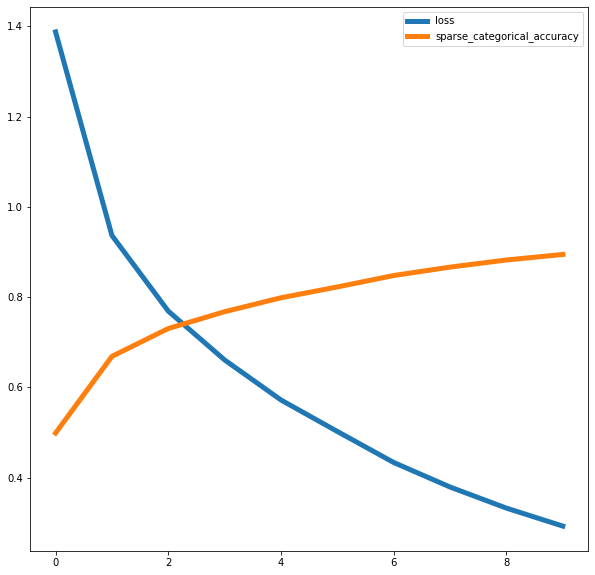

In [79]:
plt.figure(figsize=(10,10))
history1_df = pd.DataFrame(history1.history)
plt.plot(history1_df, linewidth=5)
plt.legend(history1_df.columns.to_list())
plt.show()

In [80]:
#evaluating the test loss and the test accuracy of the model
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test)

313/313 [==============================] - 14s 44ms/step - loss: 0.8463 - sparse_categorical_accuracy: 0.7568


In [81]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7567999958992004


In [50]:
#predictions using the cnn model
predictions_cnn = model_cnn.predict(x_test)

In [52]:
# print(predictions_cnn)

Building ANN Model

In [65]:
#creating the model
model_ann = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [66]:
#compiling the model
model_ann.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
#training the model
history2 = model_ann.fit(x_train, y_train, epochs=35)

Epoch 1/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8661 - accuracy: 0.3228
Epoch 2/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6916 - accuracy: 0.3960
Epoch 3/35
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6171 - accuracy: 0.4221
Epoch 4/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5715 - accuracy: 0.4391
Epoch 5/35
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5397 - accuracy: 0.4485
Epoch 6/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5049 - accuracy: 0.4638
Epoch 7/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4839 - accuracy: 0.4686
Epoch 8/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4680 - accuracy: 0.4788
Epoch 9/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4505 - accuracy: 0.4803
Epoch 10/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.44

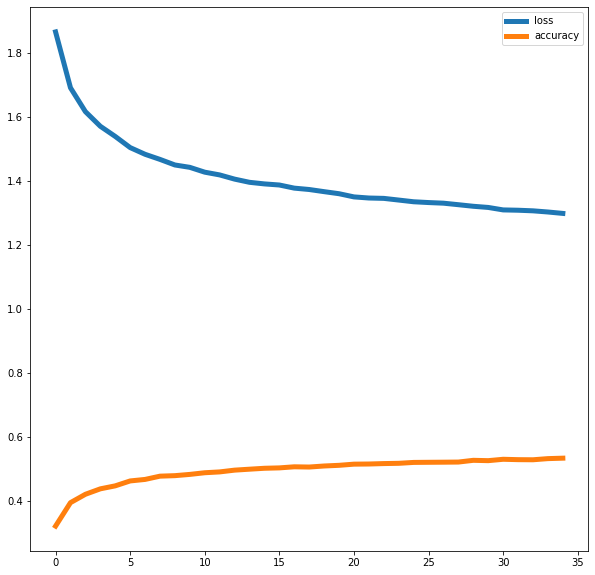

In [68]:
plt.figure(figsize=(10,10))
history2_df = pd.DataFrame(history2.history)
plt.plot(history2_df, linewidth=5)
plt.legend(history2_df.columns.to_list())
plt.show()

In [41]:
#testing the model
test_loss,test_acc = model_ann.evaluate(x_test, y_test)
print("Test accuracy:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.4685 - accuracy: 0.4823


In [43]:
#predictions using the ann model
predictions_ann = model_ann.predict(x_test)

In [ ]:
print(predictions_ann)